### Topic Modeling on Movie review : A  detailed Analysis

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.9 MB/s eta 0:00:00


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk import FreqDist
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# Import the wordcloud library
from wordcloud import WordCloud

In [ ]:
#Import Data
df = pd.read_csv('/content/movie-Review.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
np.random.seed(500)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       text
class      
Neg    1000
Pos    1000


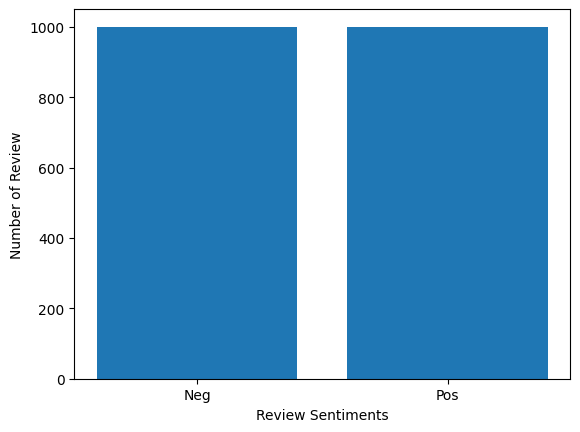

In [ ]:
class_count=df.groupby('class').count()
print(class_count)
import matplotlib.pyplot as plt
plt.bar(class_count.index.values, class_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
#Remove number
import re # import all Regular expression functions
df['text']=[re.sub('\d','', i)for i in df['text']]
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence '\d'
<>:3: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-8-53debfa22243>:3: DeprecationWarning: invalid escape sequence '\d'
  df['text']=[re.sub('\d','', i)for i in df['text']]


,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [ ]:
# Replace punctuations with a white space
import string
df['text']=[re.sub('[%s]' % re.escape(string.punctuation), ' ', i) for i in df['text']]
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [ ]:
#Convert into in lower case
df['text']=[i.lower() for i in df['text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import pandas as pd
import pandas as pd
#Word Tokenization
import nltk # import package for tokenization
nltk.download('punkt_tab') # download all spporting function /files for NLTK package
from nltk.tokenize import word_tokenize
df['text_wt'] = [word_tokenize(i) for i in df['text']]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,class,text,text_wt
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge..."


In [ ]:
#To show the stop words
nltk.download('stopwords') #download Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Remove All Stop Word
df['text_SW'] = [[i for i in j if not i in stop_words] for j in df['text_wt']]# remove the word which is aviable in stopword libr
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,class,text,text_wt,text_SW
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl..."


In [ ]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset()# tagset documentation
nltk.download('wordnet')
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc.
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as
tag_map['R'] = wn.ADV
# we will use it later in the loop.
#tag_map

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
#lemmatization
from nltk.stem import WordNetLemmatizer
 # Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df['text_SW']]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,class,text,text_wt,text_SW,lemma,lemma2
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success...","[film, adapt, comic, book, plenty, success, wh...",film adapt comic book plenty success whether s...
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ...","[every, movie, come, along, suspect, studio, e...",every movie come along suspect studio every in...
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord...","[get, mail, work, alot, good, deserves, order,...",get mail work alot good deserves order make fi...
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si...","[jaw, rare, film, grab, attention, show, singl...",jaw rare film grab attention show single image...
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl...","[moviemaking, lot, like, general, manager, nfl...",moviemaking lot like general manager nfl team ...


In [ ]:
 df['lemma2']= df['lemma'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['lemma2'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lemma2
0,film adapt comic book plenty success whether s...
1,every movie come along suspect studio every in...
2,get mail work alot good deserves order make fi...
3,jaw rare film grab attention show single image...
4,moviemaking lot like general manager nfl team ...


### Plot a bar graph of n most frequent words in the data.

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


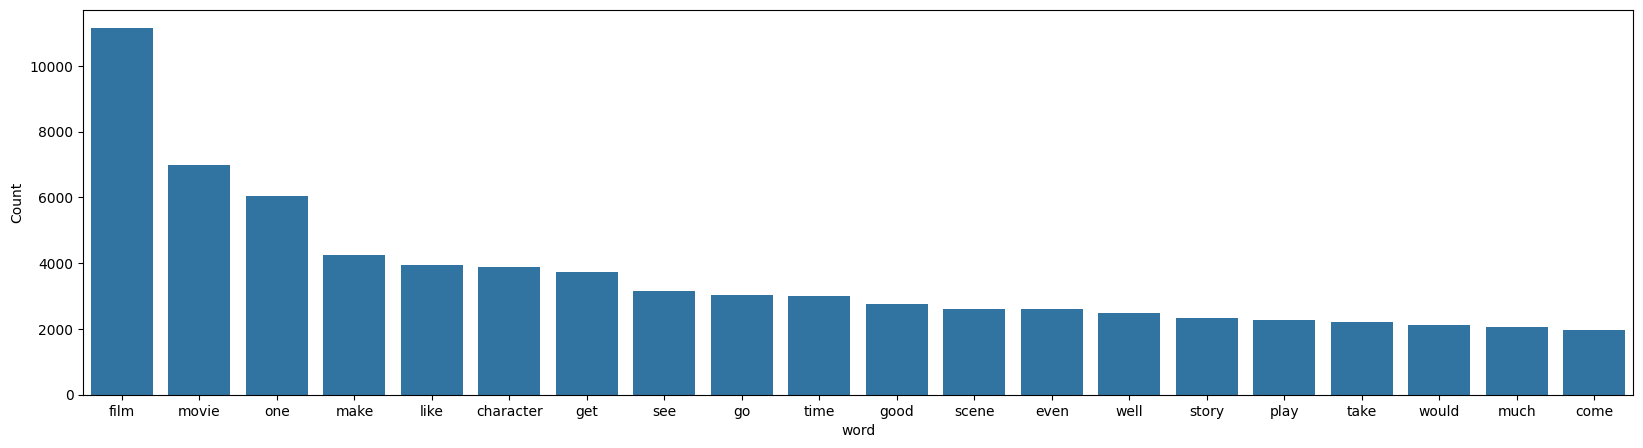

In [ ]:
freq_words(df['lemma2'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


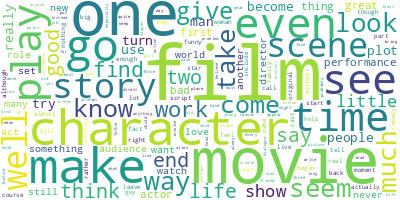

In [ ]:

# Join the different processed titles together.
long_string = ','.join(list(df['lemma2'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Create the Dictionary and Corpus needed for Topic Modeling
The two main inputs to the LDA topic model are <br>
1.The dictionary(id2word) <br>
2.The corpus <br>

Next, we need to generate a document term frequency matrix to create an LDA model. The document term frequency matrix counts how frequently a term appears in a document. For that, first, we create a dictionary of documents using the "corpora.Dictionary()" method.

The "Dictionary()" function traverses each document and assigns a unique id to each unique token along with their counts.

Next, the dictionary is converted into a bag-of-words using the "doc2bow()" method. The result is a list of vectors equal to the number of documents. Each document vector has a series of tuples with token id and token frequency pair (word_id, word_frequency).


#### Method 1: Create Bag of words using Gensim Package

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma'])

# Create Corpus
texts = df['lemma']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Method 2: Create TF-IDF using Gensim Package

In [ ]:
# Applying TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('abberline', 2),
  ('ably', 1),
  ('absinthe', 1),
  ('accent', 2),
  ('act', 2),
  ('actually', 1),
  ('adapt', 1),
  ('alan', 1),
  ('albert', 1),
  ('allen', 1),
  ('almost', 1),
  ('amount', 1),
  ('another', 1),
  ('anyone', 1),
  ('anything', 1),
  ('ape', 1),
  ('appearance', 1),
  ('arrive', 1),
  ('arthouse', 1),
  ('attempt', 1),
  ('back', 1),
  ('bad', 1),
  ('batman', 1),
  ('befriends', 1),
  ('behind', 1),
  ('big', 1),
  ('black', 1),
  ('blame', 1),
  ('bleak', 1),
  ('blindly', 1),
  ('block', 1),
  ('blow', 1),
  ('book', 4),
  ('bother', 1),
  ('briefed', 1),
  ('bring', 1),
  ('british', 1),
  ('brother', 1),
  ('burton', 1),
  ('call', 3),
  ('campbell', 3),
  ('capable', 1),
  ('capture', 1),
  ('car', 1),
  ('carrot', 1),
  ('carve', 1),
  ('case', 1),
  ('casper', 1),
  ('cast', 1),
  ('certainly', 1),
  ('child', 1),
  ('choose', 1),
  ('cinematographer', 1),
  ('cloak', 1),
  ('color', 1),
  ('coltrane', 1),
  ('comic', 5),
  ('comment', 1),
  ('commit', 1

### Building the Topic Model

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### View the topics in LDA model

In [ ]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"vampire" + 0.009*"jackie" + 0.008*"chan" + 0.007*"damme" + 0.007*"van" + 0.007*"kong" + 0.006*"fight" + 0.006*"hong" + 0.006*"jean" + 0.005*"blade"'),
 (1,
  '0.019*"film" + 0.015*"movie" + 0.011*"one" + 0.008*"make" + 0.008*"like" + 0.008*"get" + 0.007*"character" + 0.006*"go" + 0.006*"time" + 0.005*"see"'),
 (2,
  '0.013*"disney" + 0.012*"batman" + 0.011*"ape" + 0.008*"voice" + 0.008*"king" + 0.007*"tarzan" + 0.006*"schumacher" + 0.006*"jungle" + 0.006*"animate" + 0.006*"animation"'),
 (3,
  '0.006*"life" + 0.006*"love" + 0.004*"performance" + 0.004*"wife" + 0.004*"family" + 0.004*"man" + 0.003*"story" + 0.003*"young" + 0.003*"daughter" + 0.003*"woman"'),
 (4,
  '0.008*"film" + 0.008*"effect" + 0.005*"alien" + 0.005*"special" + 0.005*"action" + 0.005*"war" + 0.004*"human" + 0.004*"earth" + 0.004*"star" + 0.003*"planet"')]

### Evaluation of Topic Modeling Performance

1. Compute Model Perplexity :A measure of how good the model is. lower the better  <br>
2.Coherence Score:The average /median of the pairwise word-similarity scores of the words in the topic

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemma'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.43199187817743

Coherence Score:  0.39995333757107154


### Visualize the topics-keywords

From the below output, the bubbles on the left-side represents a topic and larger the bubble, the more prevalent is that topic.
The topic model will be good if the topic model has big, non-overlapping bubbles scattered throughout the chart.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.264793  0.012596       1        1  72.880753
3     -0.071847 -0.240371       2        1  12.949775
4     -0.101491  0.198832       3        1  11.541273
2      0.224442  0.005581       4        1   1.459786
0      0.213690  0.023362       5        1   1.168413, topic_info=             Term          Freq         Total Category  logprob  loglift
97           film  10410.000000  10410.000000  Default  30.0000  30.0000
1682       action   1353.000000   1353.000000  Default  29.0000  29.0000
423         movie   7694.000000   7694.000000  Default  28.0000  28.0000
698        effect    839.000000    839.000000  Default  27.0000  27.0000
170          love   1253.000000   1253.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
979         fight     52.430650    472.115604   Topic5  -5.0533   2.2518
1685          art     35.263016    257.698169   Topic5  -5.4500   2.4606
6750          jet     22.113045     53.723036   Topic5  -5.9166   3.5619
1682       action     33.814312   1353.704581   Topic5  -5.4919   0.7598
250   shakespeare     21.962349     79.250836   Topic5  -5.9235   3.1662

[302 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
11795      4  0.943562  absent
11795      5  0.032537  absent
1682       1  0.682571  action
1682       3  0.291792  action
1682       5  0.025116  action
...      ...       ...     ...
504        2  0.097232    year
504        3  0.109618    year
921        1  0.480975   young
921        2  0.369409   young
921        3  0.148755   young

[440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

### How to find the optimal number of topics for LDA?

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


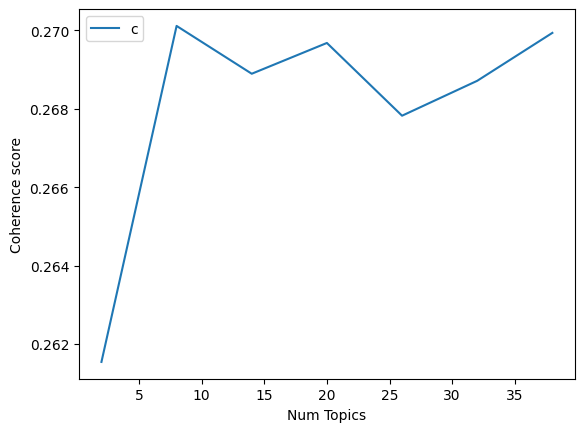

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemma'], start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2615
Num Topics = 8  has Coherence Value of 0.2701
Num Topics = 14  has Coherence Value of 0.2689
Num Topics = 20  has Coherence Value of 0.2697
Num Topics = 26  has Coherence Value of 0.2678
Num Topics = 32  has Coherence Value of 0.2687
Num Topics = 38  has Coherence Value of 0.2699


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Finding the dominant topic in each sentence <br>
We find the topic number that has the highest percentage contribution in that document.

In [ ]:
data=df['text']
optimal_model = model_list[3]
# Convert to list
data = list(df['lemma2'])
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_data = []  # Initialize as a list to store data

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Append data as a list to sent_topics_data
                sent_topics_data.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    # Create DataFrame after collecting all data
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11,0.7758,"film, one, movie, character, get, like, go, ma...",film adapt comic book plenty success whether s...
1,1,16,0.3095,"film, movie, one, like, make, see, good, go, g...",every movie come along suspect studio every in...
2,2,16,0.9955,"film, movie, one, like, make, see, good, go, g...",get mail work alot good deserves order make fi...
3,3,19,0.8951,"film, one, movie, make, see, get, character, l...",jaw rare film grab attention show single image...
4,4,11,0.9974,"film, one, movie, character, get, like, go, ma...",moviemaking lot like general manager nfl team ...
5,5,4,0.6477,"film, movie, one, like, time, go, get, good, s...",june self teach idealistic yet pragmatic young...
6,6,0,0.5254,"film, movie, like, make, one, character, good,...",apparently director tony kaye major battle new...
7,7,15,0.5422,"film, movie, make, one, get, like, time, bad, ...",one colleague surprise told willing see betsy ...
8,8,4,0.8581,"film, movie, one, like, time, go, get, good, s...",bloody clash independence lumumba refuse pande...
9,9,18,0.9964,"film, one, movie, make, character, go, see, go...",american action film slowly drown death sea as...


### Find the most representative document for each topic <br>
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, we can find the documents a given topic has contributed to the most and infer the topic by reading that document.

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9972,"film, movie, like, make, one, character, good,...",mm write seven scribe andrew kevin walker inte...
1,1,0.9975,"movie, film, one, make, like, get, character, ...",american werewolf paris fail attempt recapture...
2,2,0.9957,"film, one, movie, make, character, scene, like...",oliver stone late feature last one stand long ...
3,3,0.9966,"film, one, get, make, scene, movie, also, like...",freedom one determine free question difficult ...
4,4,0.9967,"film, movie, one, like, time, go, get, good, s...",holy man boast sweet gentle comic performance ...
5,5,0.9978,"film, one, character, movie, make, like, get, ...",ingredient man amnesia wake want murder dark s...
6,6,0.9974,"film, movie, like, see, one, character, make, ...",recent onslaught film noir pop multiplex every...
7,7,0.9970,"film, movie, one, like, character, scene, see,...",part one strangest movie ever make series www ...
8,8,0.9964,"movie, film, make, one, get, character, time, ...",late epos lars blast although rather moody one...
9,9,0.9970,"film, movie, one, make, like, see, character, ...",outset swordfish john travolta gabriel shear p...


The tabular output above actually has 20 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. The Perc_Contribution column is nothing but the percentage contribution of the topic in the given document.

### Topic distribution across documents

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
#df_dominant_topics.sort_values(by=['Dominant_Topic'], inplace=True)
df_dominant_topics.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,11,"film, one, movie, character, get, like, go, ma...",70.0,0.0350
1,16,"film, movie, one, like, make, see, good, go, g...",88.0,0.0440
2,16,"film, movie, one, like, make, see, good, go, g...",17.0,0.0085
3,19,"film, one, movie, make, see, get, character, l...",26.0,0.0130
4,11,"film, one, movie, character, get, like, go, ma...",88.0,0.0440
5,4,"film, movie, one, like, time, go, get, good, s...",66.0,0.0330
6,0,"film, movie, like, make, one, character, good,...",72.0,0.0360
7,15,"film, movie, make, one, get, like, time, bad, ...",11.0,0.0055
8,4,"film, movie, one, like, time, go, get, good, s...",35.0,0.0175
9,18,"film, one, movie, make, character, go, see, go...",53.0,0.0265


### Frequency Distribution of Word Counts in Documents <br>
When working with a large number of documents, we want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean   : 2356
Median : 2182
Stdev   : 1035
1%ile    : 703
99%ile  : 5574


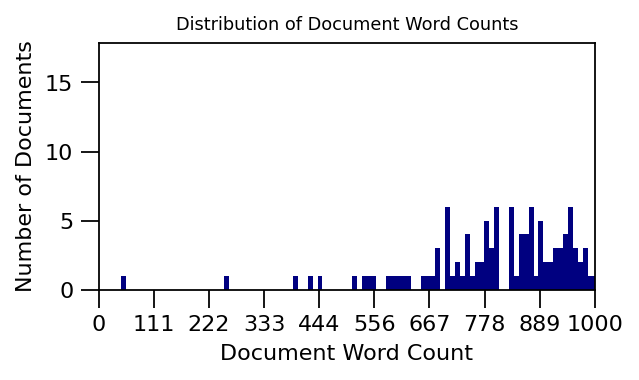

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(4,2), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
print( "Mean   : " + str(round(np.mean(doc_lens))))
print( "Median : " + str(round(np.median(doc_lens))))
print(  "Stdev   : " + str(round(np.std(doc_lens))))
print( "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
print( "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=8)
plt.xticks(np.linspace(0,1000,10))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=8))
plt.show()